In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df= pd.read_csv('/content/data.csv', encoding='latin1')

1️⃣ Data Understanding

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [28]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [29]:
df.shape

(541909, 8)

In [30]:
df.size

4335272

2️⃣ Data Cleaning & Preparation

In [31]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [32]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [33]:
df.dropna(subset=['CustomerID'], inplace=True)

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [36]:
df['InvoiceDate']= pd.to_datetime (df['InvoiceDate'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [38]:
#Create Required columns
df['Sales']= df['Quantity'] * df['UnitPrice']

In [39]:
df['Month']= df['InvoiceDate'].dt.month

In [40]:
df['Year']=df['InvoiceDate'].dt.year

In [41]:
df['Day of Week']= df['InvoiceDate'].dt.day_name()
df['Day']=df['InvoiceDate'].dt.day

In [42]:
df['Week']=df['InvoiceDate'].dt.isocalendar().week
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day of Week,Day,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,Wednesday,1,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,Wednesday,1,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48


3️⃣ Overall Sales Analysis

In [43]:
#Calculate total revenue generated
total_revenue =df['Sales'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $8911407.90


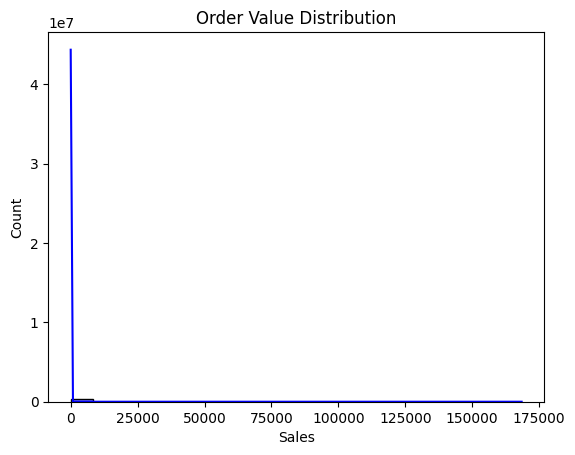

In [44]:
sns.histplot(df['Sales'], bins=20 , color='Blue', edgecolor ='Black', kde=True)

plt.title("Order Value Distribution")
plt.show()

In [45]:
#Analyze number of transactions
num_transactions = df['InvoiceNo'].nunique()
print(f'Number of Transactions: {num_transactions}')

Number of Transactions: 18536


In [46]:
#Study average order value
avg_order_value = total_revenue / num_transactions
print(f'Average Order Value: ${avg_order_value:.2f}')

Average Order Value: $480.76


Identify daily, monthly, and yearly sales trends

In [47]:
daily_sales =df.groupby('InvoiceDate')['Sales'].sum()
print(f'Daily Sales:\n{daily_sales}')


Daily Sales:
InvoiceDate
2010-12-01 08:26:00    139.12
2010-12-01 08:28:00     22.20
2010-12-01 08:34:00    348.78
2010-12-01 08:35:00     17.85
2010-12-01 08:45:00    855.86
                        ...  
2011-12-09 12:23:00    124.60
2011-12-09 12:25:00    140.64
2011-12-09 12:31:00    329.05
2011-12-09 12:49:00    339.20
2011-12-09 12:50:00    249.45
Name: Sales, Length: 17286, dtype: float64


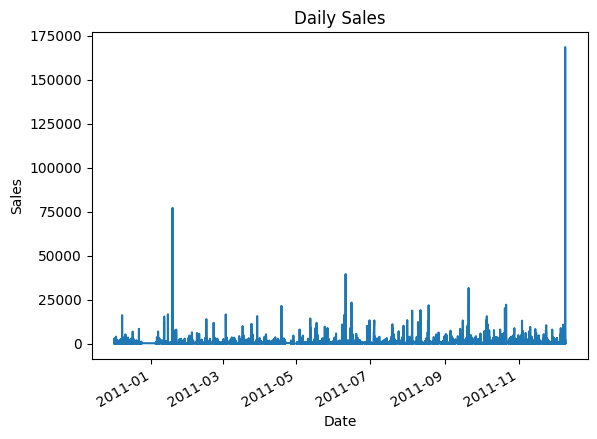

In [48]:
#Line charts for sales over time
daily_sales.plot(kind='line', title='Daily Sales')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [49]:
weekly_sales = df.groupby('Week')['Sales'].sum()
print(f'Weekly Sales:\n{weekly_sales}')

Weekly Sales:
Week
1     114865.270
2     154714.940
3     175757.980
4     105288.770
5     106095.230
6      88015.420
7     126050.400
8     130687.360
9     117600.820
10    112338.000
11    138278.820
12    129918.430
13    143977.030
14    119961.920
15    135142.201
16    116090.020
17     73474.560
18    131329.180
19    178850.250
20    196269.920
21    146976.900
22    102371.900
23    194019.080
24    171940.300
25    112818.820
26    116479.920
27    131383.740
28    118297.880
29    167519.810
30    164667.901
31    156185.190
32    143652.210
33    168080.690
34    148051.260
35    114046.780
36    167004.060
37    209167.980
38    309569.211
39    194007.851
40    297116.860
41    204423.280
42    255461.640
43    237685.490
44    260628.770
45    264765.980
46    277773.940
47    249532.680
48    401174.550
49    622016.870
50    163770.730
51     46109.110
Name: Sales, dtype: float64


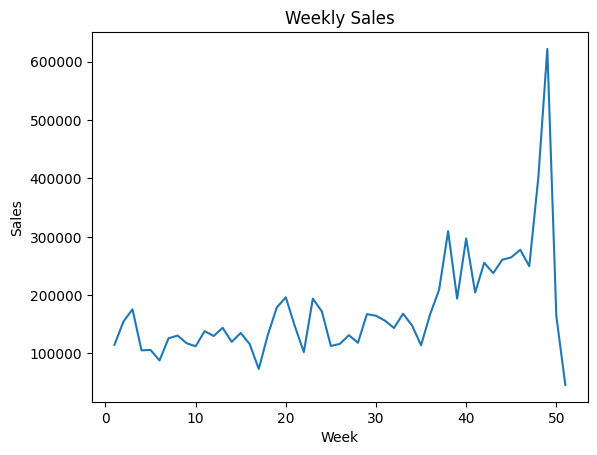

In [50]:
weekly_sales.plot(kind='line', title='Weekly Sales')
plt.xlabel("Week")
plt.ylabel("Sales")
plt.show()

In [51]:
monthly_sales = df.groupby('Month')['Sales'].sum()
print(f'Monthly Sales:\n{monthly_sales}')

Monthly Sales:
Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: Sales, dtype: float64


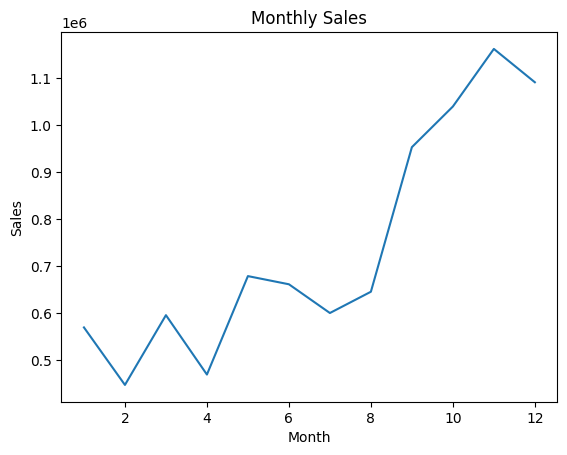

In [52]:
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales")
plt.show()

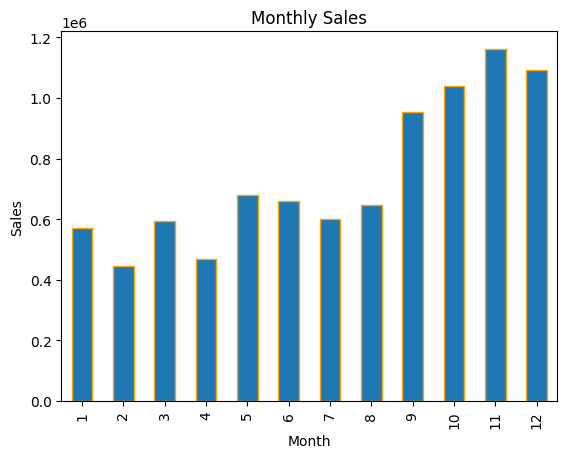

In [53]:
monthly_sales.plot(kind='bar', title='Monthly Sales',edgecolor='orange')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


In [54]:
#Identify  month  with maximum sale
maximum_sale_month = df.groupby('Month')['Sales'].sum().idxmax()
print(f'Month with Maximum Sale: {maximum_sale_month}')

Month with Maximum Sale: 11


In [55]:
yearly_sales = df.groupby('Year')['Sales'].sum()
print(f'Yearly Sales:\n{yearly_sales}')

Yearly Sales:
Year
2010     572713.890
2011    8338694.014
Name: Sales, dtype: float64


In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day of Week,Day,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,Wednesday,1,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,Wednesday,1,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48


4️⃣ Product Performance Analysis

In [57]:
#IDENTIFY TOP 10 SELLING PRODUCT
top_selling_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
print(f'Top 10 Selling Products:\n{top_selling_products}')

Top 10 Selling Products:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


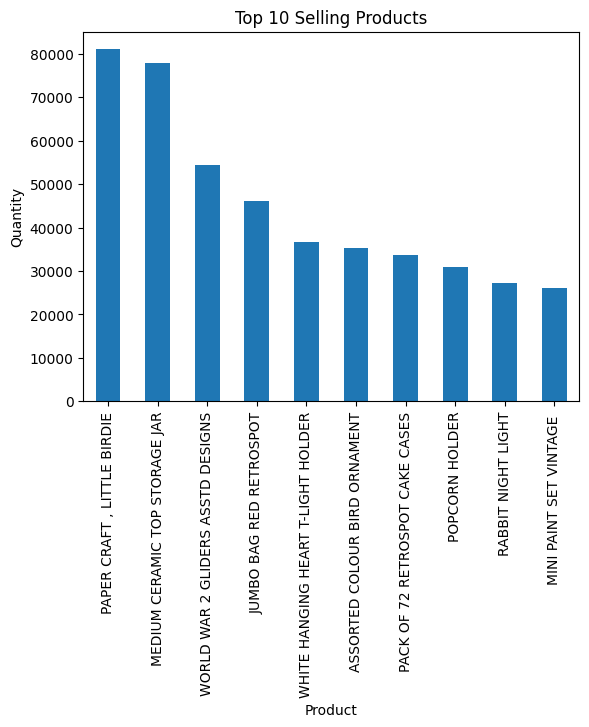

In [58]:

top_selling_products.plot(kind='bar', title='Top 10 Selling Products' )
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.show()

In [59]:
#IDENTIFY PRODUCT WITH MAXIMUM REVENUE
maximum_revenue_products = df.groupby('Description')['Sales'].sum().nlargest(10)
print(f'Product with Maximum Revenue: {maximum_revenue_products}')

Product with Maximum Revenue: Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Sales, dtype: float64


In [60]:
#IDENTIFY MOST FREQUENTLY PURCHSED PRODCUTS
frequently_purchased_prodcuts = df.groupby('Description')['InvoiceNo'].nunique().nlargest(10)
print(f'Frequently Purchased Products:\n{frequently_purchased_prodcuts}')

Frequently Purchased Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    1971
REGENCY CAKESTAND 3 TIER              1704
JUMBO BAG RED RETROSPOT               1600
PARTY BUNTING                         1380
ASSORTED COLOUR BIRD ORNAMENT         1375
LUNCH BAG RED RETROSPOT               1288
SET OF 3 CAKE TINS PANTRY DESIGN      1146
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1052
PACK OF 72 RETROSPOT CAKE CASES       1029
Name: InvoiceNo, dtype: int64


In [61]:
frequently_purchased_prodcuts= df.groupby('Description')['Quantity'].count().nlargest(10)
print(f'Frequently Purchased Products:\n{frequently_purchased_prodcuts}')

Frequently Purchased Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Quantity, dtype: int64


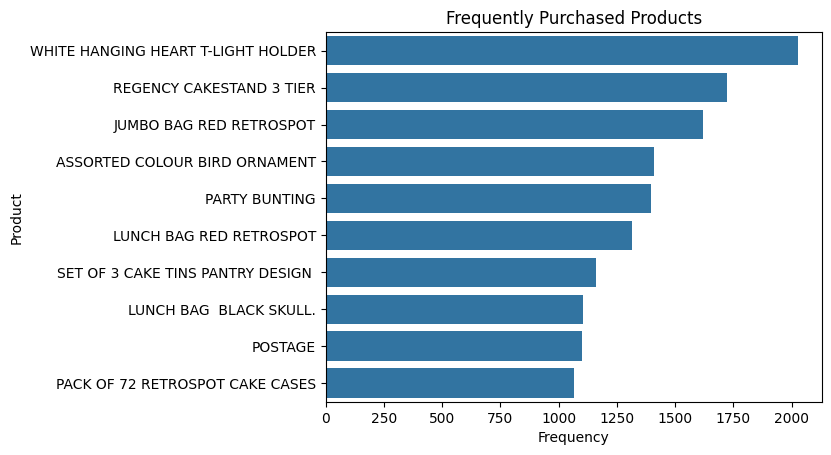

In [62]:
sns.countplot(y='Description', data=df, order=df['Description'].value_counts().index[:10])
plt.xlabel("Frequency")
plt.ylabel("Product")
plt.title("Frequently Purchased Products")
plt.show()

In [63]:
#IDENTIFY LOW REVENUE GENERATE PRODUCT
low_revenue_products = df.groupby('Description')['Sales'].sum().nsmallest(10)
print(f'Low Revenue Products:\n{low_revenue_products}')

Low Revenue Products:
Description
PADS TO MATCH ALL CUSHIONS             0.003
HEN HOUSE W CHICK IN NEST              0.420
SET 12 COLOURING PENCILS DOILEY        0.650
VINTAGE BLUE TINSEL REEL               0.840
PINK CRYSTAL GUITAR PHONE CHARM        0.850
PURPLE FRANGIPANI HAIRCLIP             0.850
CAT WITH SUNGLASSES BLANK CARD         0.950
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
BLACKCHRISTMAS TREE 30CM               1.250
Name: Sales, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PADS TO MATCH ALL CUSHIONS'),
  Text(1, 0, 'HEN HOUSE W CHICK IN NEST'),
  Text(2, 0, 'SET 12 COLOURING PENCILS DOILEY'),
  Text(3, 0, 'VINTAGE BLUE TINSEL REEL'),
  Text(4, 0, 'PINK CRYSTAL GUITAR PHONE CHARM'),
  Text(5, 0, 'PURPLE FRANGIPANI HAIRCLIP'),
  Text(6, 0, 'CAT WITH SUNGLASSES BLANK CARD'),
  Text(7, 0, 'HAPPY BIRTHDAY CARD TEDDY/CAKE'),
  Text(8, 0, '60 GOLD AND SILVER FAIRY CAKE CASES'),
  Text(9, 0, 'BLACKCHRISTMAS TREE 30CM')])

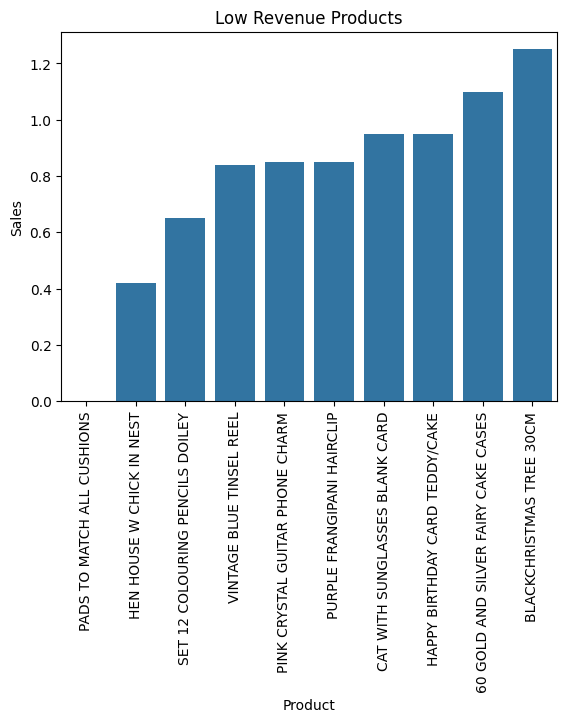

In [64]:
sns.barplot(x=low_revenue_products.index, y=low_revenue_products.values)
plt.xlabel("Product")
plt.ylabel("Sales")
plt.title("Low Revenue Products")
plt.xticks(rotation=90)

In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day of Week,Day,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,Wednesday,1,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,Wednesday,1,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48


In [66]:
total_unit_price= df['UnitPrice'].sum()
print(f'Total Unit Price: ${total_unit_price:.2f}')

Total Unit Price: $1240000.61


5️⃣ Customer Behavior Analysis

In [67]:
#IDENTIFY UNIQUE CUSTOMERS
unique_customers = df['CustomerID'].nunique()
print(f'Number of Unique Customers: {unique_customers}')

Number of Unique Customers: 4339


In [68]:
#Analyze repeat vs one-time customers
customer_frequency = df['CustomerID'].value_counts()
print(f'{customer_frequency}')
repeat_customers = customer_frequency[customer_frequency > 1].count()
one_time_customers = customer_frequency[customer_frequency == 1].count()
print(f'Number of Repeat Customers: {repeat_customers}')
print(f'Number of One-Time Customers: {one_time_customers}')

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
17986.0       1
16737.0       1
13017.0       1
16093.0       1
18174.0       1
Name: count, Length: 4339, dtype: int64
Number of Repeat Customers: 4267
Number of One-Time Customers: 72


In [69]:
#Calculate customer purchase frequency
customer_purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
print(f'Customer Purchase Frequency:\n{customer_purchase_frequency}')

Customer Purchase Frequency:
CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4339, dtype: int64


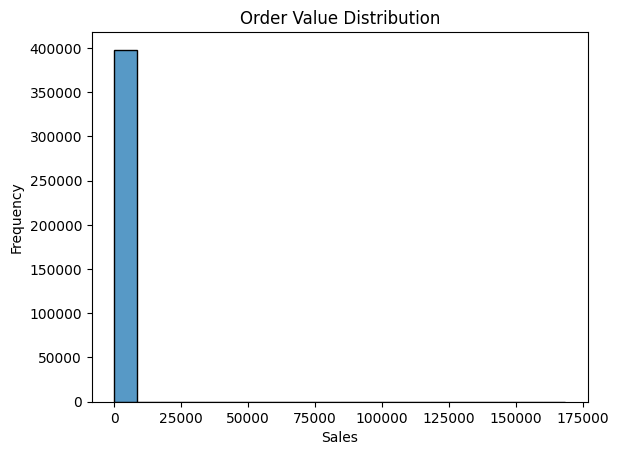

In [93]:
# Histogram Order value distribution without kde
sns.histplot(df['Sales'], bins=20 )
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Order Value Distribution")
plt.show()

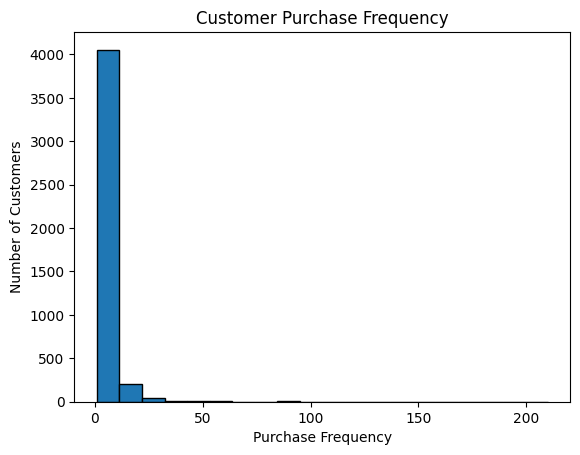

In [71]:
customer_purchase_frequency.plot(kind='hist', bins=20, title='Customer Purchase Frequency' , edgecolor='black')
plt.xlabel("Purchase Frequency")
plt.ylabel("Number of Customers")
plt.show()

In [72]:
#IDENTIFY HIGH VALUE CUSTOMERS
high_value_customers= df.groupby('CustomerID')['Sales'].sum().nlargest(10)
print(f'High Value Customers:\n{high_value_customers}')

High Value Customers:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Sales, dtype: float64


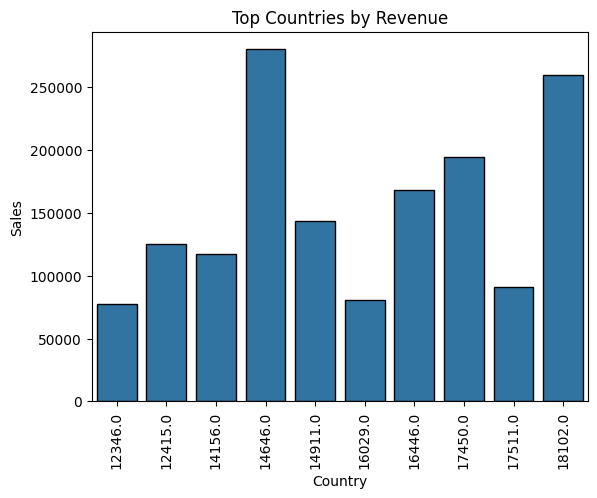

In [95]:
sns.barplot(x=high_value_customers.index, y=high_value_customers.values, edgecolor='black' )
plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Top Countries by Revenue")
plt.xticks(rotation=90)
plt.show()

In [74]:
average_order_value = df.groupby('CustomerID')['Sales'].mean()
print(f'Average Order Value:\n{average_order_value}')

Average Order Value:
CustomerID
12346.0    77183.600000
12347.0       23.681319
12348.0       57.975484
12349.0       24.076027
12350.0       19.670588
               ...     
18280.0       18.060000
18281.0       11.545714
18282.0       14.837500
18283.0        2.771005
18287.0       26.246857
Name: Sales, Length: 4339, dtype: float64


6️⃣ Country-Wise Sales Analysis

In [75]:
#IDENTIFY COUNTRY-WISE SALES
country_sales =df.groupby('Country')['Sales'].sum()
print(f'Country-wise Sales:\n{country_sales}')

Country-wise Sales:
Country
Australia                138521.310
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20450.440
Cyprus                    13590.380
Czech Republic              826.740
Denmark                   18955.340
EIRE                     265545.900
European Community         1300.250
Finland                   22546.080
France                   209024.050
Germany                  228867.140
Greece                     4760.520
Iceland                    4310.000
Israel                     7221.690
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal                  33439.890


In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day of Week,Day,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,Wednesday,1,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,Wednesday,1,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48


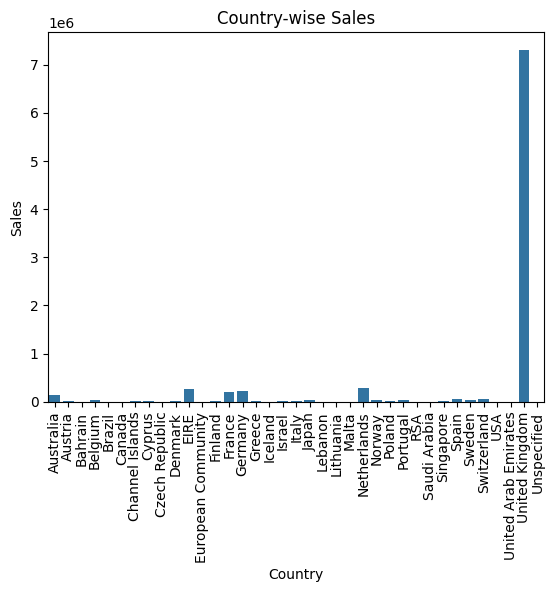

In [77]:
sns.barplot(x=country_sales.index, y=country_sales.values )
plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Country-wise Sales")
plt.xticks(rotation=90)
plt.show()

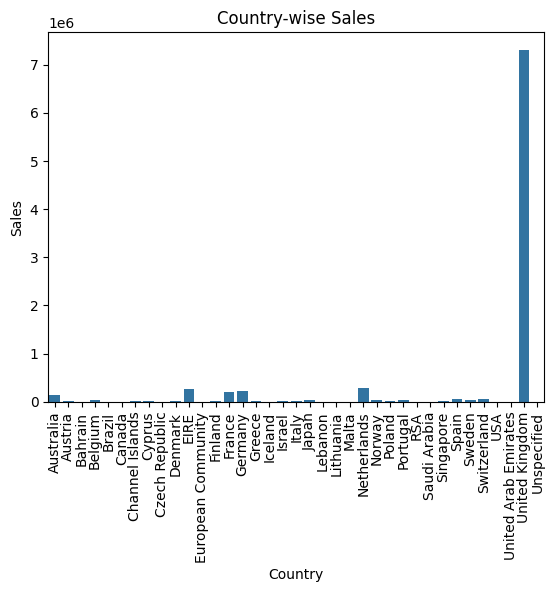

In [78]:
sns.barplot(x=country_sales.index, y=country_sales.values )
plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Country-wise Sales")
plt.xticks(rotation=90)
plt.show()

In [79]:
#TOP COUNTRIES BY REVENUE
top_revenue_countries= df.groupby('Country')['Sales'].sum().nlargest(10)
print(f'Top Countries by Revenue:\n{top_revenue_countries}')

Top Countries by Revenue:
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Sales, dtype: float64


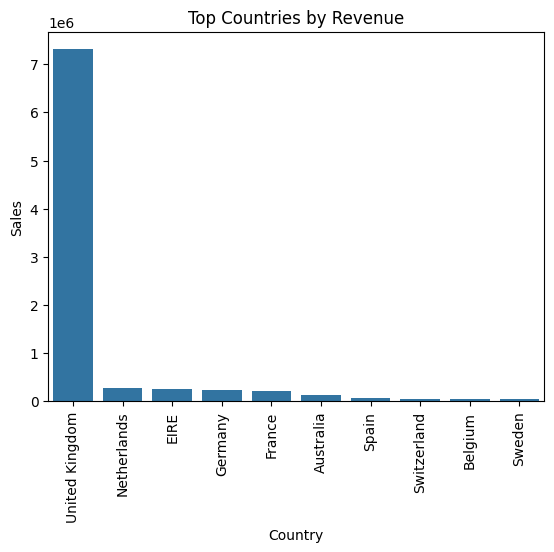

In [80]:
sns.barplot(x=top_revenue_countries.index, y=top_revenue_countries.values )
plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Top Countries by Revenue")
plt.xticks(rotation=90)
plt.show()

In [81]:
#ANALYZE TOP CONTRIES BY ORDER
top_countries_orders= df.groupby('Country')['InvoiceNo'].nunique().nlargest(10)
print(f'Top  Countries by Order:\n{top_countries_orders}')

Top  Countries by Order:
Country
United Kingdom    16649
Germany             457
France              389
EIRE                260
Belgium              98
Netherlands          95
Spain                90
Australia            57
Portugal             57
Switzerland          51
Name: InvoiceNo, dtype: int64


In [82]:
#Heatmaps showing sales concentration
sales_heatmap =df.pivot_table( index='Country', columns='Month', values='Sales', aggfunc='sum')
print(f'Sales Heatmap:\n{sales_heatmap}')


Sales Heatmap:
Month                        1          2          3           4          5   \
Country                                                                        
Australia               9017.71   14695.42   17223.99     771.600   13638.41   
Austria                     NaN     518.36    1708.12     680.780    1249.43   
Bahrain                     NaN        NaN        NaN         NaN     548.40   
Belgium                 1200.20    2181.07    3351.98    1989.480    2732.40   
Brazil                      NaN        NaN        NaN    1143.600        NaN   
Canada                      NaN        NaN     140.54         NaN     534.24   
Channel Islands          675.58    1784.71    3509.33     293.000    1207.24   
Cyprus                   547.50    4334.24     938.39         NaN        NaN   
Czech Republic              NaN     549.26        NaN         NaN        NaN   
Denmark                     NaN     399.22    3978.99         NaN     515.70   
EIRE                   21

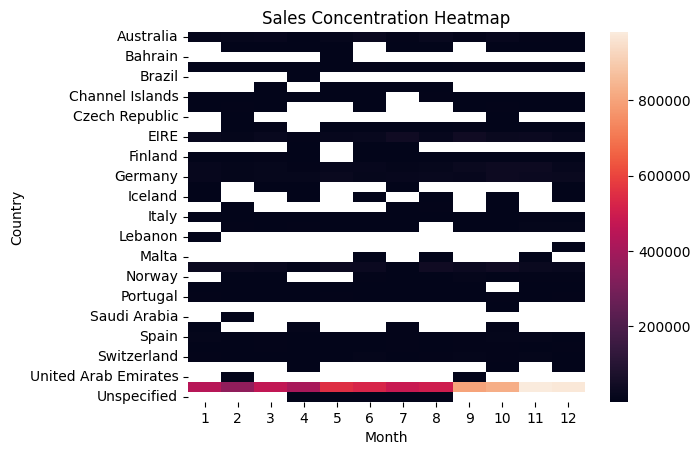

In [83]:
sns.heatmap(sales_heatmap)
plt.title("Sales Concentration Heatmap")
plt.show()

In [84]:
#CUSTOMER BEHAV DIFFER BY COUNTRY
cust_behav_differ_by_country = df.groupby(['Country', 'Day of Week'])['Sales'].sum()
print(f'Customer Behavior Differences by Country:\n{cust_behav_differ_by_country}')

Customer Behavior Differences by Country:
Country         Day of Week
Australia       Friday            4245.430
                Monday            1392.640
                Sunday            1743.930
                Thursday         53555.990
                Tuesday          32526.090
                                  ...     
United Kingdom  Tuesday        1418573.601
                Wednesday      1280843.370
Unspecified     Monday            1015.910
                Thursday           798.480
                Tuesday            852.680
Name: Sales, Length: 160, dtype: float64


In [85]:
#Revenue contribution using cumulative sum
cumulative_revenue = np.cumsum(df.groupby('Country')['Sales'].sum())
print(f'Cumulative Revenue:\n{cumulative_revenue}')

Cumulative Revenue:
Country
Australia                138521.310
Austria                  148719.990
Bahrain                  149268.390
Belgium                  190464.730
Brazil                   191608.330
Canada                   195274.710
Channel Islands          215725.150
Cyprus                   229315.530
Czech Republic           230142.270
Denmark                  249097.610
EIRE                     514643.510
European Community       515943.760
Finland                  538489.840
France                   747513.890
Germany                  976381.030
Greece                   981141.550
Iceland                  985451.550
Israel                   992673.240
Italy                   1010156.480
Japan                   1047572.850
Lebanon                 1049266.730
Lithuania               1050927.790
Malta                   1053653.380
Netherlands             1339099.720
Norway                  1375265.160
Poland                  1382599.810
Portugal                1416039.700


In [86]:
#CREATE HOUR COLUMN
df['Hour']= df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day of Week,Day,Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,Wednesday,1,48,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,Wednesday,1,48,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Wednesday,1,48,8


In [87]:
##Sales by day of week vs hour
sales_by_day_hour = df.pivot_table(index='Day of Week', columns='Hour', values='Sales', aggfunc='sum')
print(f'Sales by Day of Week vs Hour:\n{sales_by_day_hour}')



Sales by Day of Week vs Hour:
Hour           6         7         8           9           10         11  \
Day of Week                                                                
Friday        NaN  17284.88  52656.61  296468.681  183204.580  166918.03   
Monday        NaN   1494.58  43358.33  123987.220  184190.320  160863.69   
Sunday        NaN       NaN       NaN     778.800   81310.470  143064.31   
Thursday     4.25   6883.71  67860.75  134141.940  273926.730  170818.61   
Tuesday       NaN   2052.58  72469.67  164290.630  295075.641  261161.63   
Wednesday     NaN   3343.46  45770.27  122937.900  243484.830  201732.48   

Hour                12         13          14         15         16  \
Day of Week                                                           
Friday       230147.75  167563.00  160028.500  136998.01   44114.20   
Monday       185186.20  225840.81  188026.830  141110.60   74796.41   
Sunday       154151.98  138441.70  105493.661  130004.28   39269.02   
Thursd

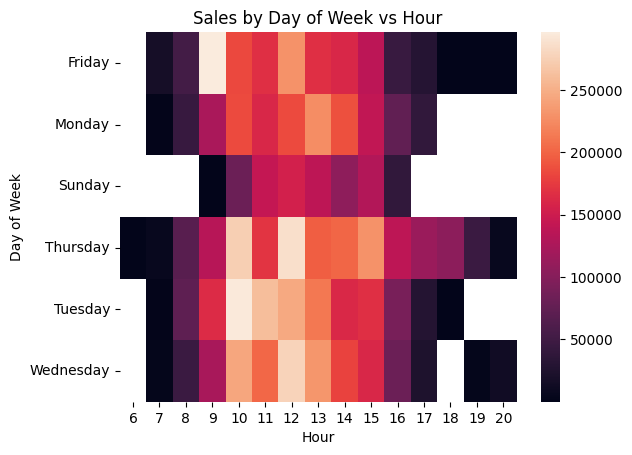

In [88]:
sns.heatmap(sales_by_day_hour)
plt.title("Sales by Day of Week vs Hour")
plt.show()


In [89]:
#Monthly sales vs year
monthly_sales_year = df.pivot_table(index='Year', columns='Month', values='Sales', aggfunc='sum')
print(f'Monthly Sales vs Year:\n{monthly_sales_year}')


Monthly Sales vs Year:
Month         1          2          3           4          5          6   \
Year                                                                       
2010         NaN        NaN        NaN         NaN        NaN        NaN   
2011   569445.04  447137.35  595500.76  469200.361  678594.56  661213.69   

Month          7         8           9           10          11         12  
Year                                                                        
2010          NaN       NaN         NaN         NaN         NaN  572713.89  
2011   600091.011  645343.9  952838.382  1039318.79  1161817.38  518192.79  


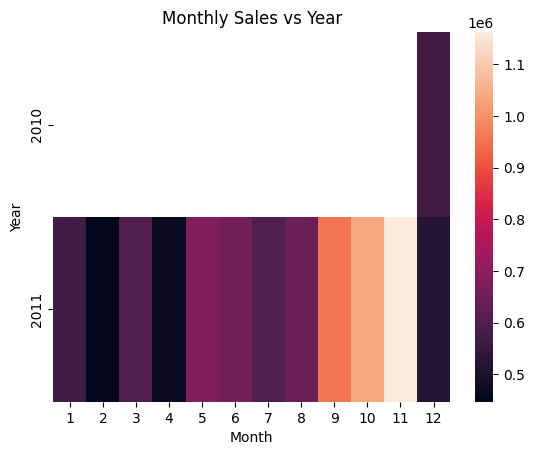

In [90]:
sns.heatmap(monthly_sales_year,)
plt.title("Monthly Sales vs Year")
plt.show()

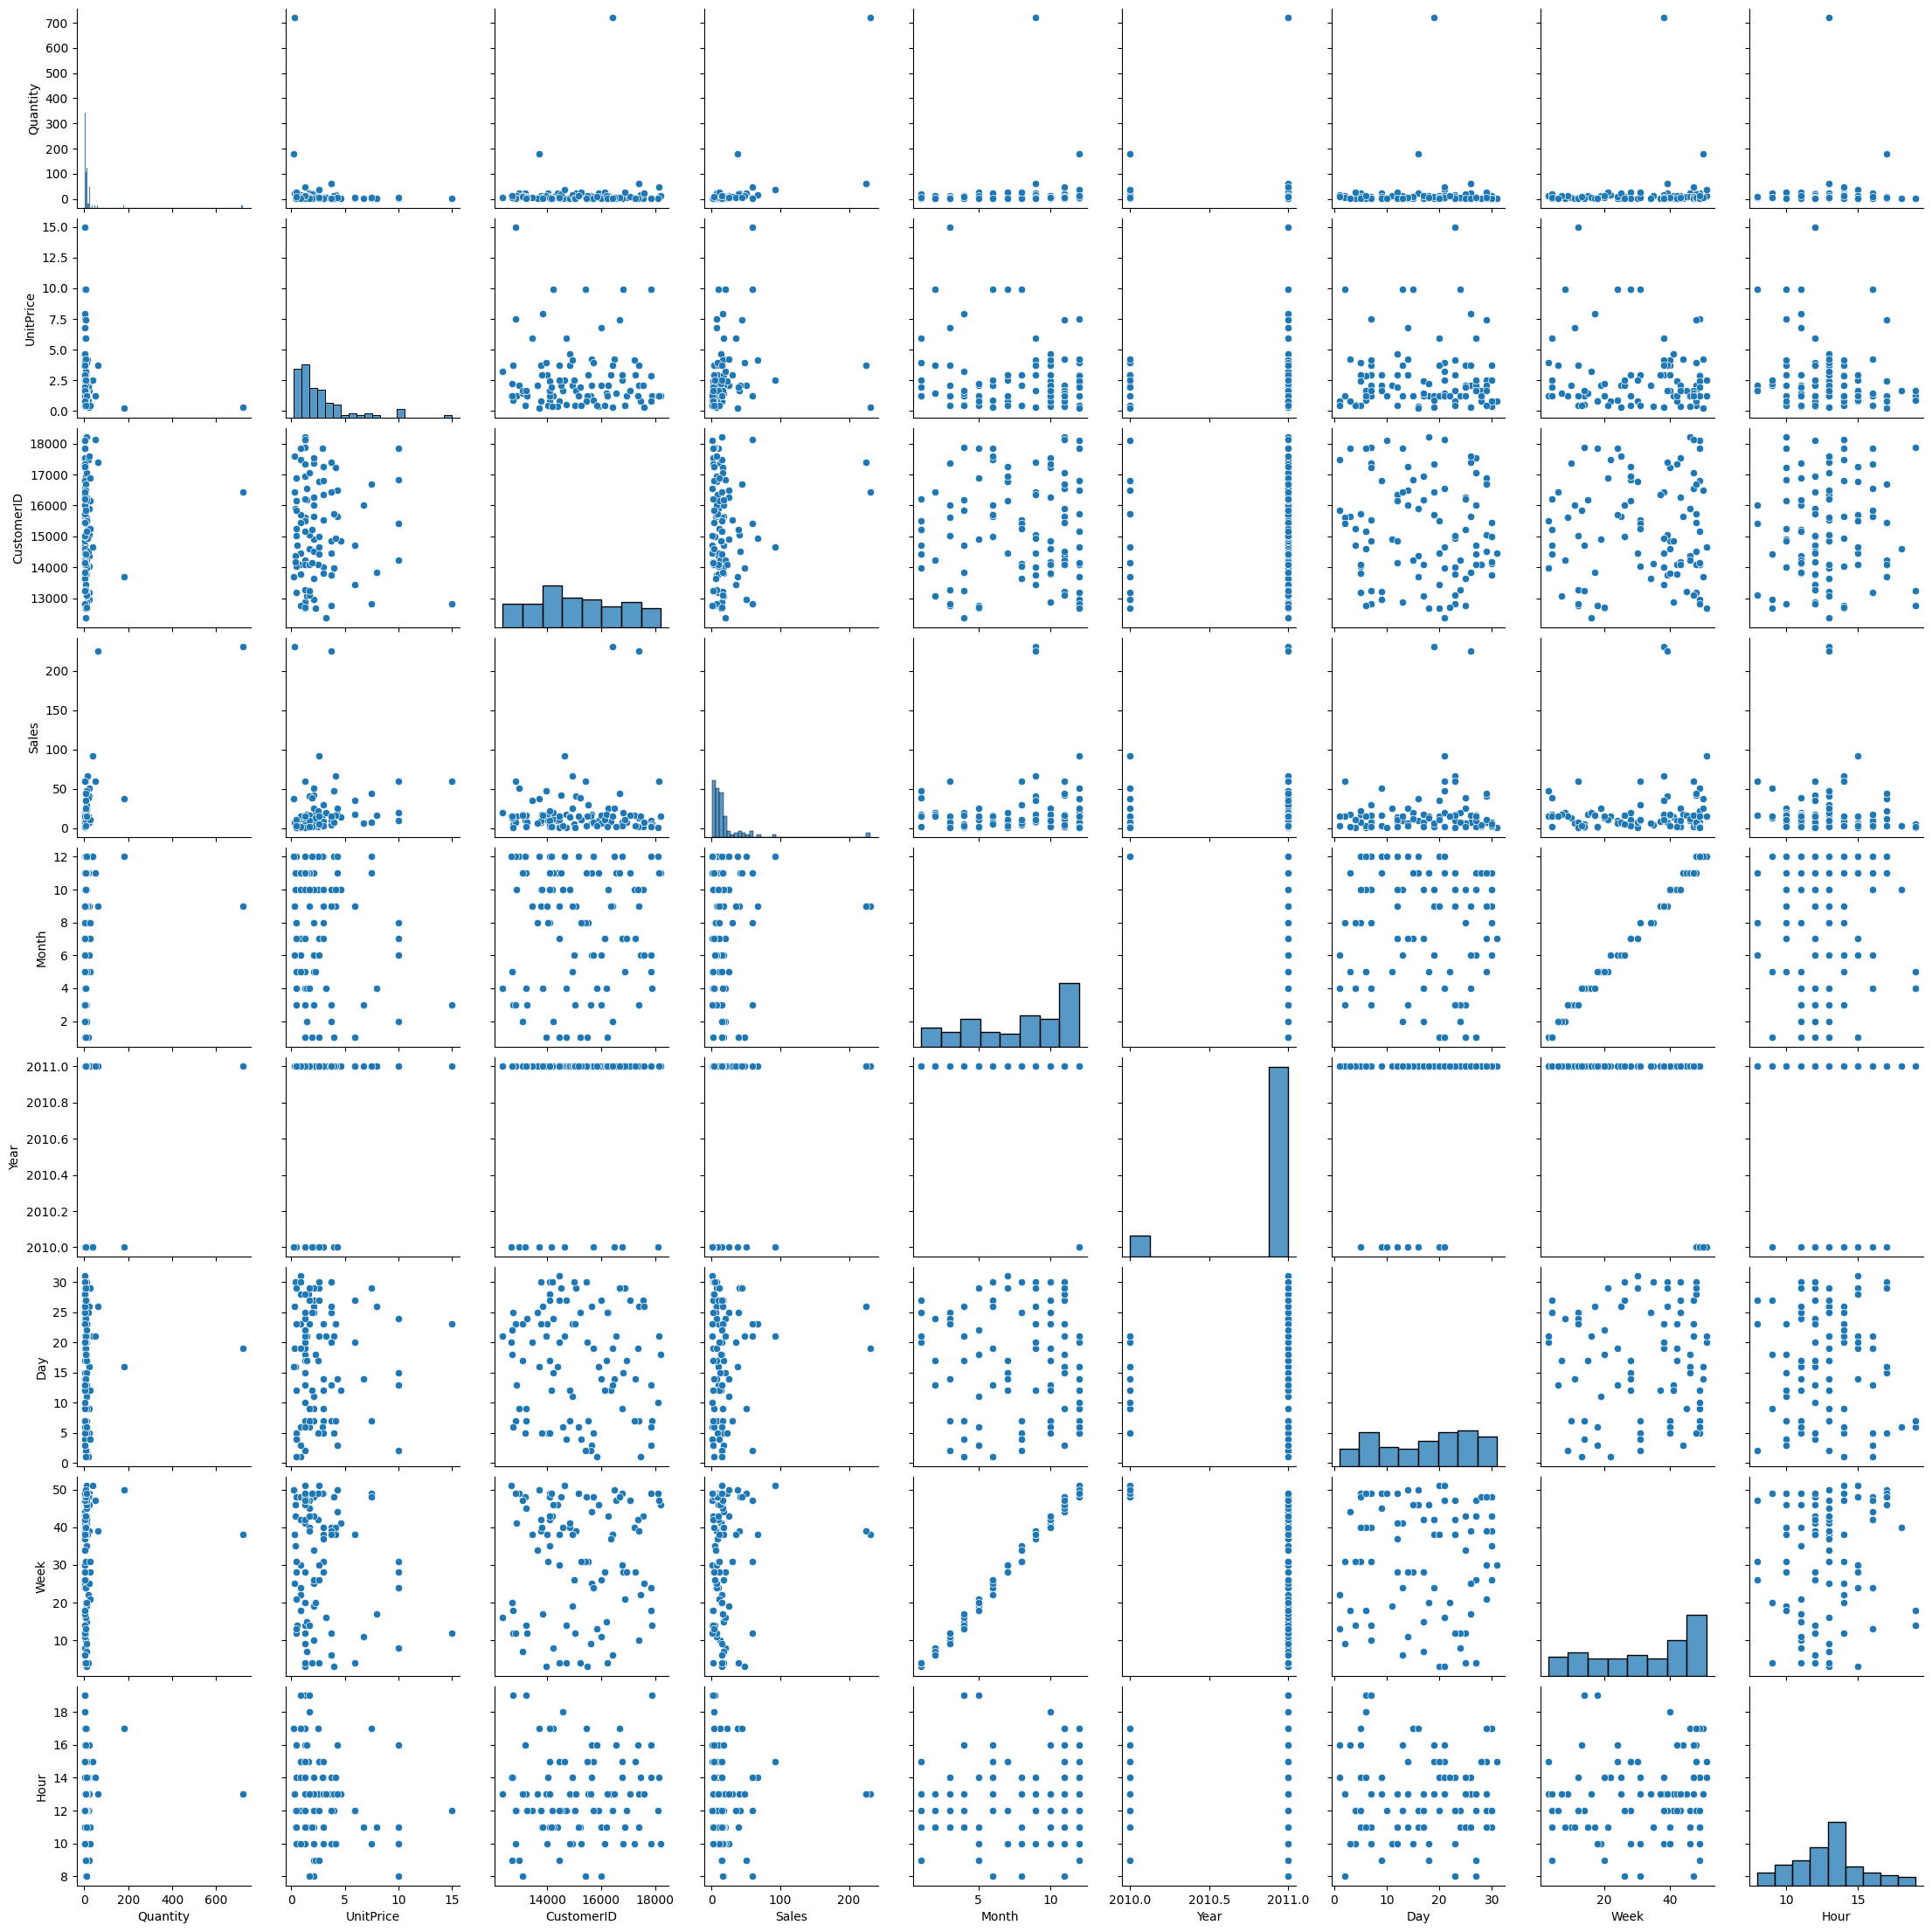

In [96]:
#pairplot of  100 rows
sns.pairplot(df.sample(100))

